In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

figsize = (14, 3.5)

# Exercise: Seoul Bike Sharing (Categorical Attributes)

## Context

<center>
<img src="assets/bike_sharing.jpg" width=60%/>    
</center>

Let's revisit the Seoul Bike Sharing Problem


* We will use the same dataset as the previous exercise, but this time we will include all attributes (minus the date)
* Moreover, we will trea the `Hour` attribute as categorical, with the aim of encoding it using a one-hot approach

In [2]:
import pandas as pd
import os

fname = os.path.join('data', 'SeoulBikeData.csv')
data = pd.read_csv(fname, sep=',')

num_input = ['Temperature(^C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(^C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
cat_input = ['Hour', 'Seasons', 'Holiday', 'Functioning Day']
output = 'Rented Bike Count'

data_flt = data[num_input + cat_input + [output]]
data_flt.head()

,Temperature(^C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(^C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour,Seasons,Holiday,Functioning Day,Rented Bike Count
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,Winter,No Holiday,Yes,254
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,Winter,No Holiday,Yes,204
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2,Winter,No Holiday,Yes,173
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,Winter,No Holiday,Yes,107
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,Winter,No Holiday,Yes,78


## Dataset Inspection

We can inspect the distribution of categorical attributes by:

* Computing value counts (i.e. occurrencies of each value)
* Displaying them using pie charts

Try to build them for all our categorical input:

<Axes: ylabel='count'>

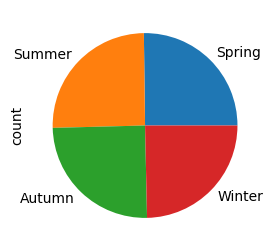

In [3]:
from matplotlib import pyplot as plt

# An example here
plt.figure(figsize=(14, 3))
data_flt['Seasons'].value_counts().plot.pie()

We can inspect the correlation between a categorical and a numerical attribute by using boxplots

* Try to build them for all the categorical inputs and the target

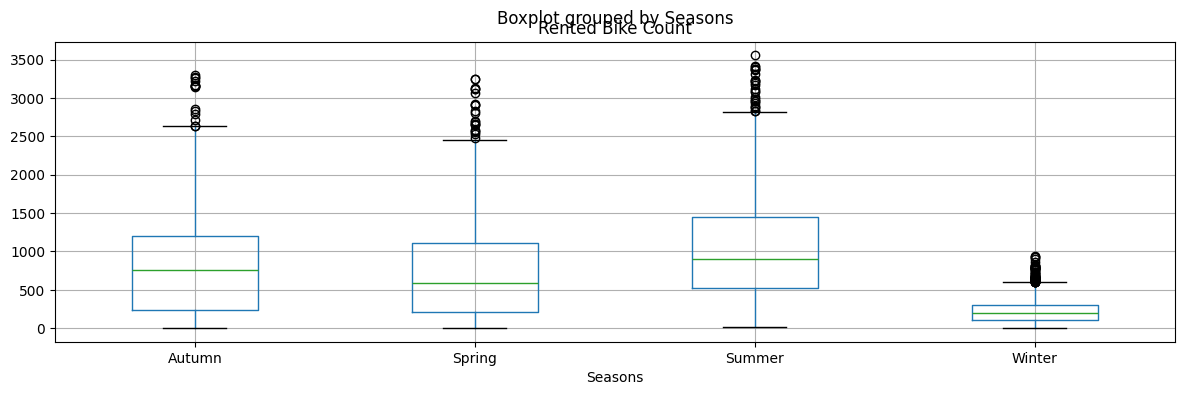

In [4]:
# An example here
data_flt.boxplot(column=output, by='Seasons', figsize=(14, 4));

## Categorical Encoding

We will now encode all categorical attributes using the `get_dummies` function:

In [6]:
data_d = pd.get_dummies(data_flt, columns=cat_input)
data_d

,Temperature(^C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(^C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Hour_0,...,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254,True,...,False,False,False,False,False,True,False,True,False,True
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204,False,...,False,False,False,False,False,True,False,True,False,True
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173,False,...,False,False,False,False,False,True,False,True,False,True
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107,False,...,False,False,False,False,False,True,False,True,False,True
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1003,False,...,False,False,True,False,False,False,False,True,False,True
8756,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,764,False,...,False,False,True,False,False,False,False,True,False,True
8757,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,694,False,...,False,False,True,False,False,False,False,True,False,True
8758,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,712,False,...,True,False,True,False,False,False,False,True,False,True


## Train-Test Splitting

We can split input/output and train/test data as usual:

In [7]:
from sklearn.model_selection import train_test_split

all_input = [c for c in data_d if c != output] # we cannot use `cat_input`, since the names have changed
X = data_d[all_input]
y = data_d[[output]] # We use a list, so we obtain a DataFrame

test_set_fraction = .34
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=test_set_fraction, random_state=42)

print(f"Number of training examples: {len(X_tr)}")
print(f"Number of test examples: {len(X_ts)}")

Number of training examples: 5781
Number of test examples: 2979


Now, based on the code from the previous exercise, try to:

* Build a linear regression model
* Train it on `X_tr`, `y_tr`
* Display the value of the $R^2$ coefficient for both the training and the test set
* Compare it with the results obtained using only numerical attributes

Some open questions:

* What happens if we move `Hour` back to the numerical attributes?
* Why?